In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
create_scaled_scatter <- function(data, column1, column2) {
    scaled_train <- train %>% mutate(scaled_1 = scale(data[column1], center = TRUE), scaled_2 = scale(data[column2], center = TRUE))
    plot <- scaled_train %>% ggplot(aes(x = scaled_1, y =  scaled_2, colour=Survived)) + 
           geom_point(alpha = 0.4) +
           xlab(column1) +
           ylab(column2) +
           ggtitle(paste(column1,"vs",column2,sep= " "))
    return(plot)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [5]:
train <- read_csv("train.csv") %>% mutate(Survived = as_factor(Survived), DirectRelatives = SibSp + Parch) %>% filter(Fare > 30, Fare <500)
summary(train)

Parsed with column specification:
cols(
  PassengerId = col_double(),
  Survived = col_double(),
  Pclass = col_double(),
  Name = col_character(),
  Sex = col_character(),
  Age = col_double(),
  SibSp = col_double(),
  Parch = col_double(),
  Ticket = col_character(),
  Fare = col_double(),
  Cabin = col_character(),
  Embarked = col_character()
)



  PassengerId    Survived     Pclass          Name               Sex           
 Min.   :  2.0   0: 98    Min.   :1.000   Length:231         Length:231        
 1st Qu.:232.5   1:133    1st Qu.:1.000   Class :character   Class :character  
 Median :458.0            Median :1.000   Mode  :character   Mode  :character  
 Mean   :446.5            Mean   :1.459                                        
 3rd Qu.:668.0            3rd Qu.:2.000                                        
 Max.   :880.0            Max.   :3.000                                        
                                                                               
      Age            SibSp           Parch           Ticket         
 Min.   : 0.92   Min.   :0.000   Min.   :0.0000   Length:231        
 1st Qu.:21.00   1st Qu.:0.000   1st Qu.:0.0000   Class :character  
 Median :31.50   Median :1.000   Median :0.0000   Mode  :character  
 Mean   :32.20   Mean   :1.108   Mean   :0.7619                     
 3rd Qu.:45.00 

Warning message:
“Removed 31 rows containing missing values (geom_point).”


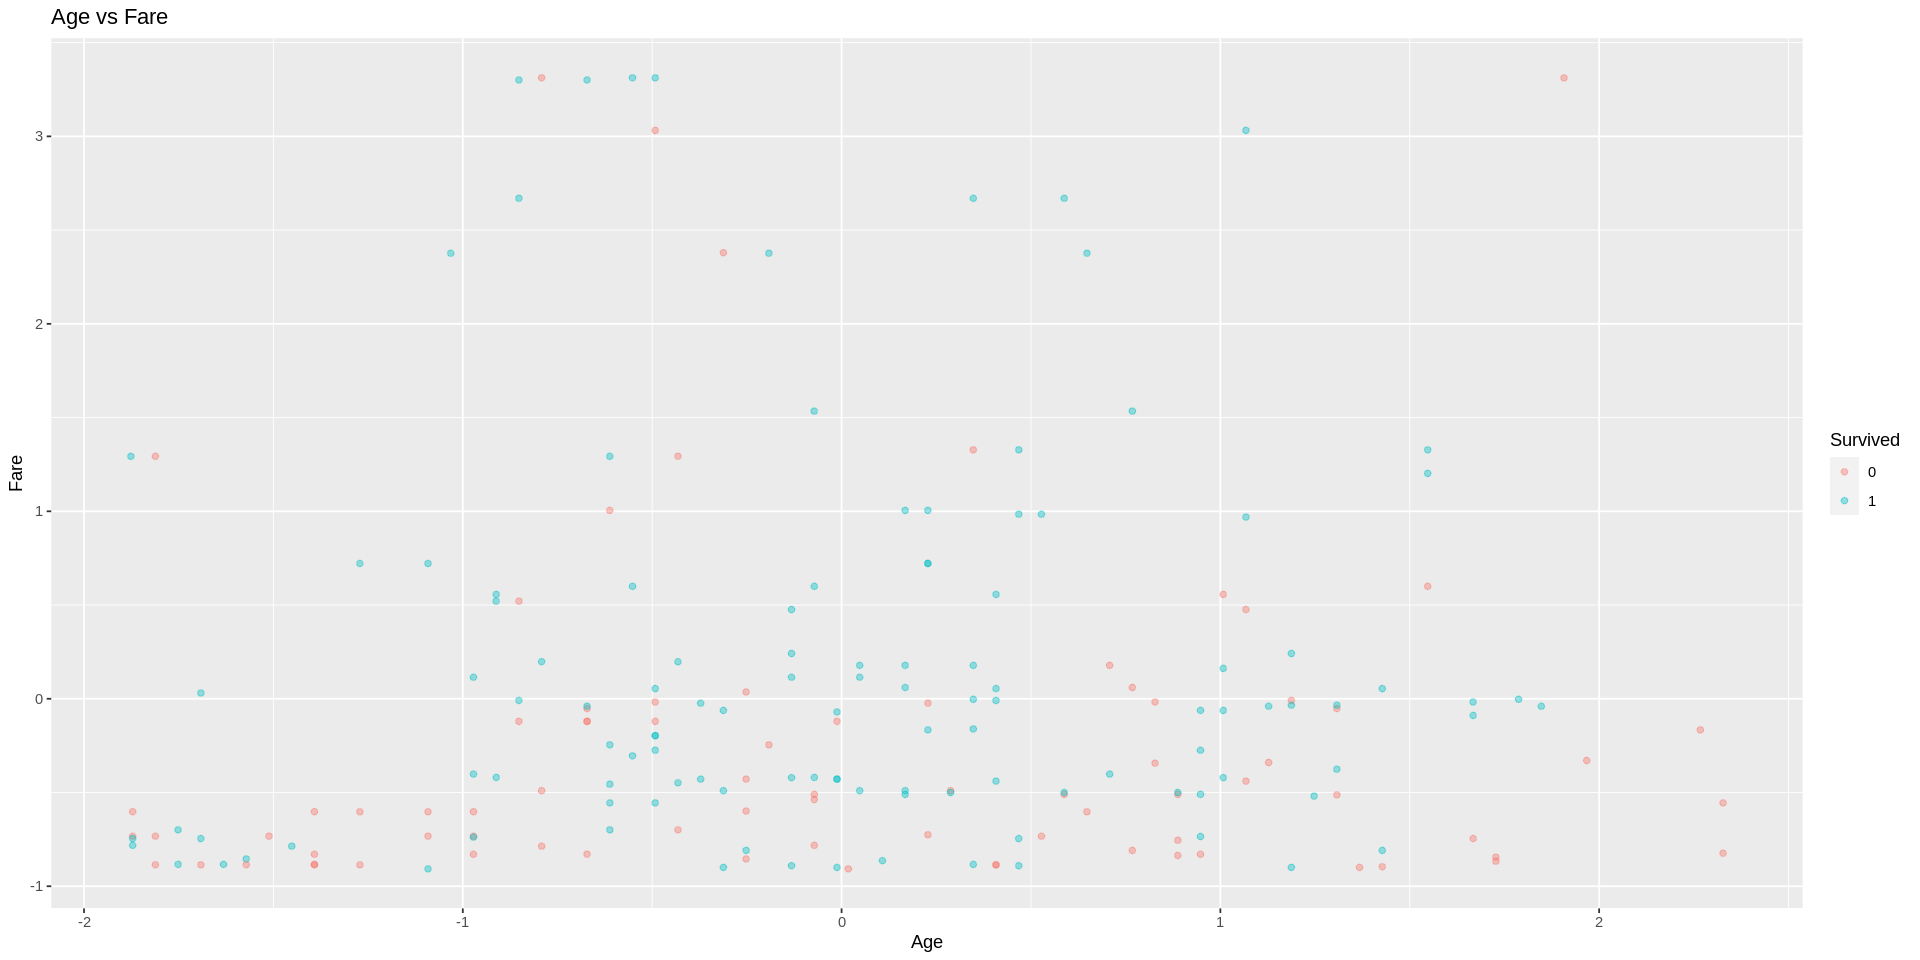

In [4]:
options(repr.plot.width = 16, repr.plot.height = 8) 
create_scaled_scatter(train, "Age", "Fare")